## Exploring tweets containing word "bitcoin" from mid-summer 2016

July 28 - August 6, 2016

This is another small dataset (~3000 tweets), so semantic insight into bitcoin in a way done with charisma data is probably not possible - still may be other interesting patterns.

For this example no attempt is made to remove spammy or repetitive posts.

In general Twords was designed to look at frequencies and semantics for terms likely to be used in casual conversation (like "charisma") more so than terms that likely have a lot of marketing behind them (like "brexit" or "bitcoin"), but people specifically interested in a term like "bitcoin" may still find interesing patterns here.

In [1]:
import sys
sys.path.append('..')

from twords.twords import Twords 
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
# this pandas line makes the dataframe display all text in a line; useful for seeing entire tweets
pd.set_option('display.max_colwidth', -1)

In [2]:
twit = Twords()
twit.data_path = "../data/java_collector/bitcoin/"
twit.background_path = '../jar_files_and_background/freq_table_72319443_total_words_twitter_corpus.csv'
twit.create_Background_dict()
twit.set_Search_terms(["bitcoin"])
twit.create_Stop_words()

In [3]:
twit.get_java_tweets_from_csv_list()

In [4]:
# find how many tweets we have in original dataset
print "Total number of tweets:", len(twit.tweets_df)

Total number of tweets: 3097


# Standard cleaning

In [5]:
twit.lower_tweets()
twit.keep_only_unicode_tweet_text()
twit.remove_urls_from_tweets()
twit.convert_tweet_dates_to_standard()
twit.sort_tweets_by_date()
twit.drop_duplicates_in_text()
twit.drop_by_search_in_name()

Removing urls from tweets...
This may take a minute - cleaning rate is about 400,000 tweets per minute
Time to complete: 0.013 minutes
Tweets cleaned per minute: 245321.2


In [6]:
len(twit.tweets_df)

2014

In [7]:
twit.keep_tweets_with_terms("bitcoin")

In [8]:
len(twit.tweets_df)

1576

# Create word_freq_df


In [9]:
twit.create_word_bag()
twit.make_nltk_object_from_word_bag()
twit.create_word_freq_df(1000)

Time to make words_string:  0.0 minutes
Time to tokenize:  0.008 minutes
Time to compute word bag:  0.002 minutes
Creating word_freq_df...
Takes about 1 minute per 1000 words
Time to create word_freq_df:  0.4079 minutes


In [10]:
twit.word_freq_df.sort_values("log relative frequency", ascending = False, inplace = True)
twit.word_freq_df.head(20)

,word,occurrences,frequency,relative frequency,log relative frequency,background_occur
2,bitfinex,230,0.015109,13831.063331,9.534672,79
22,amplifies,48,0.003153,10365.097263,9.246199,22
36,/r/,34,0.002233,5384.092189,8.591204,30
186,satoshis,10,0.000657,3958.891316,8.283719,12
259,bitcoin…,8,0.000526,3800.535663,8.242897,10
127,125k,14,0.000920,3694.965228,8.214726,18
178,megaupload,11,0.000723,3483.824358,8.155886,15
335,ulbricht,7,0.000460,3325.468705,8.109366,10
67,marinecoin,20,0.001314,3276.323848,8.094477,29
355,vircurex,6,0.000394,2850.401747,7.955215,10


# Plot results with varying background cutoffs


## At least 100 background occurrences:

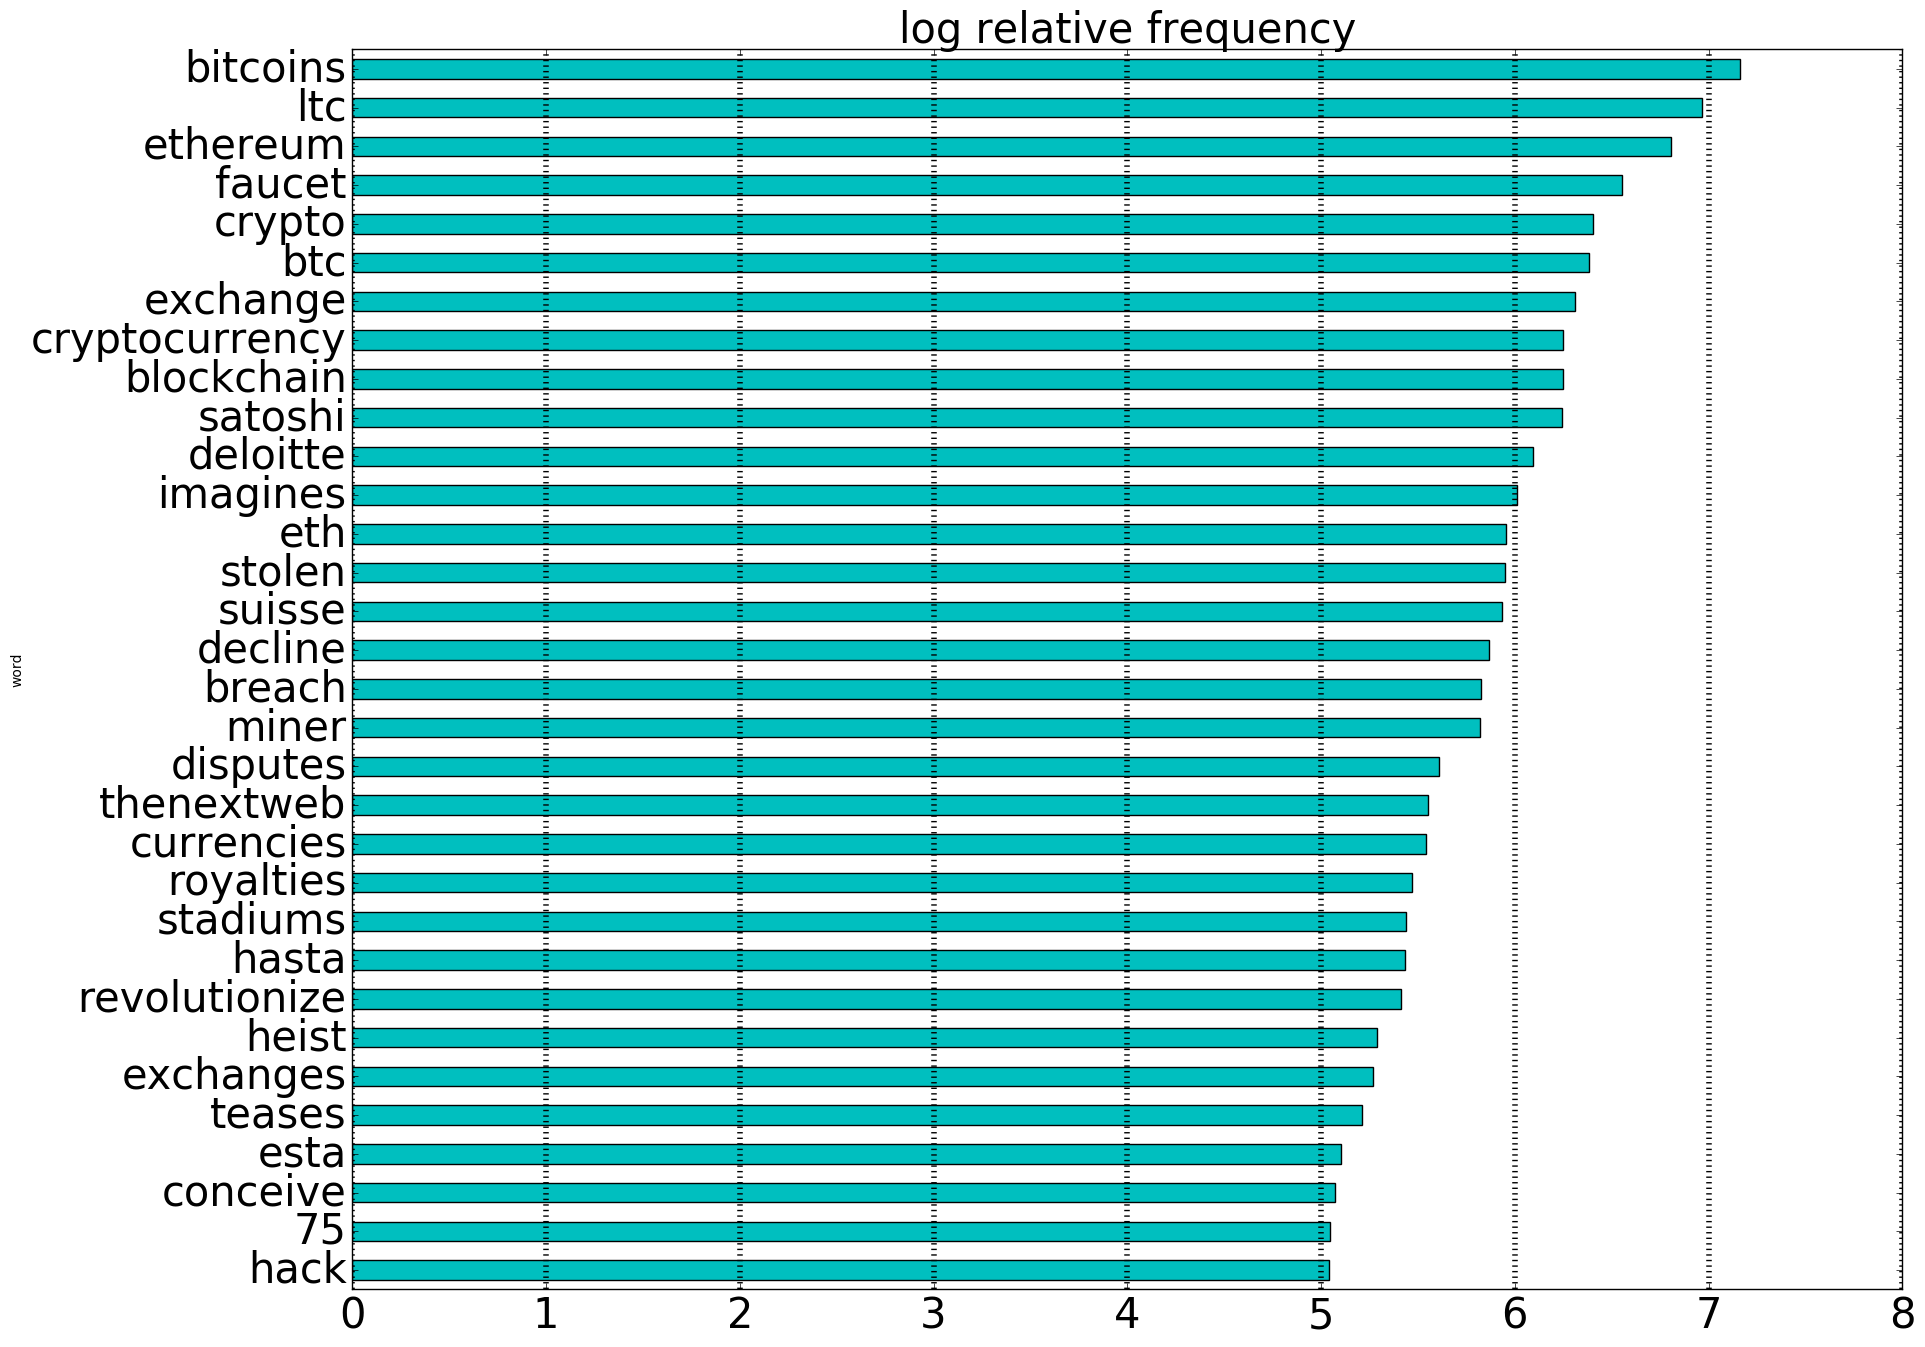

In [11]:
num_words_to_plot = 32
background_cutoff = 100
twit.word_freq_df[twit.word_freq_df["background_occur"]>background_cutoff].sort_values("log relative frequency", ascending=True).set_index("word")["log relative frequency"][-num_words_to_plot:].plot.barh(figsize=(20,
                num_words_to_plot/2.), fontsize=30, color="c"); 
plt.title("log relative frequency", fontsize=30); 
ax = plt.axes();        
ax.xaxis.grid(linewidth=4);

## At least 500 background occurrences:

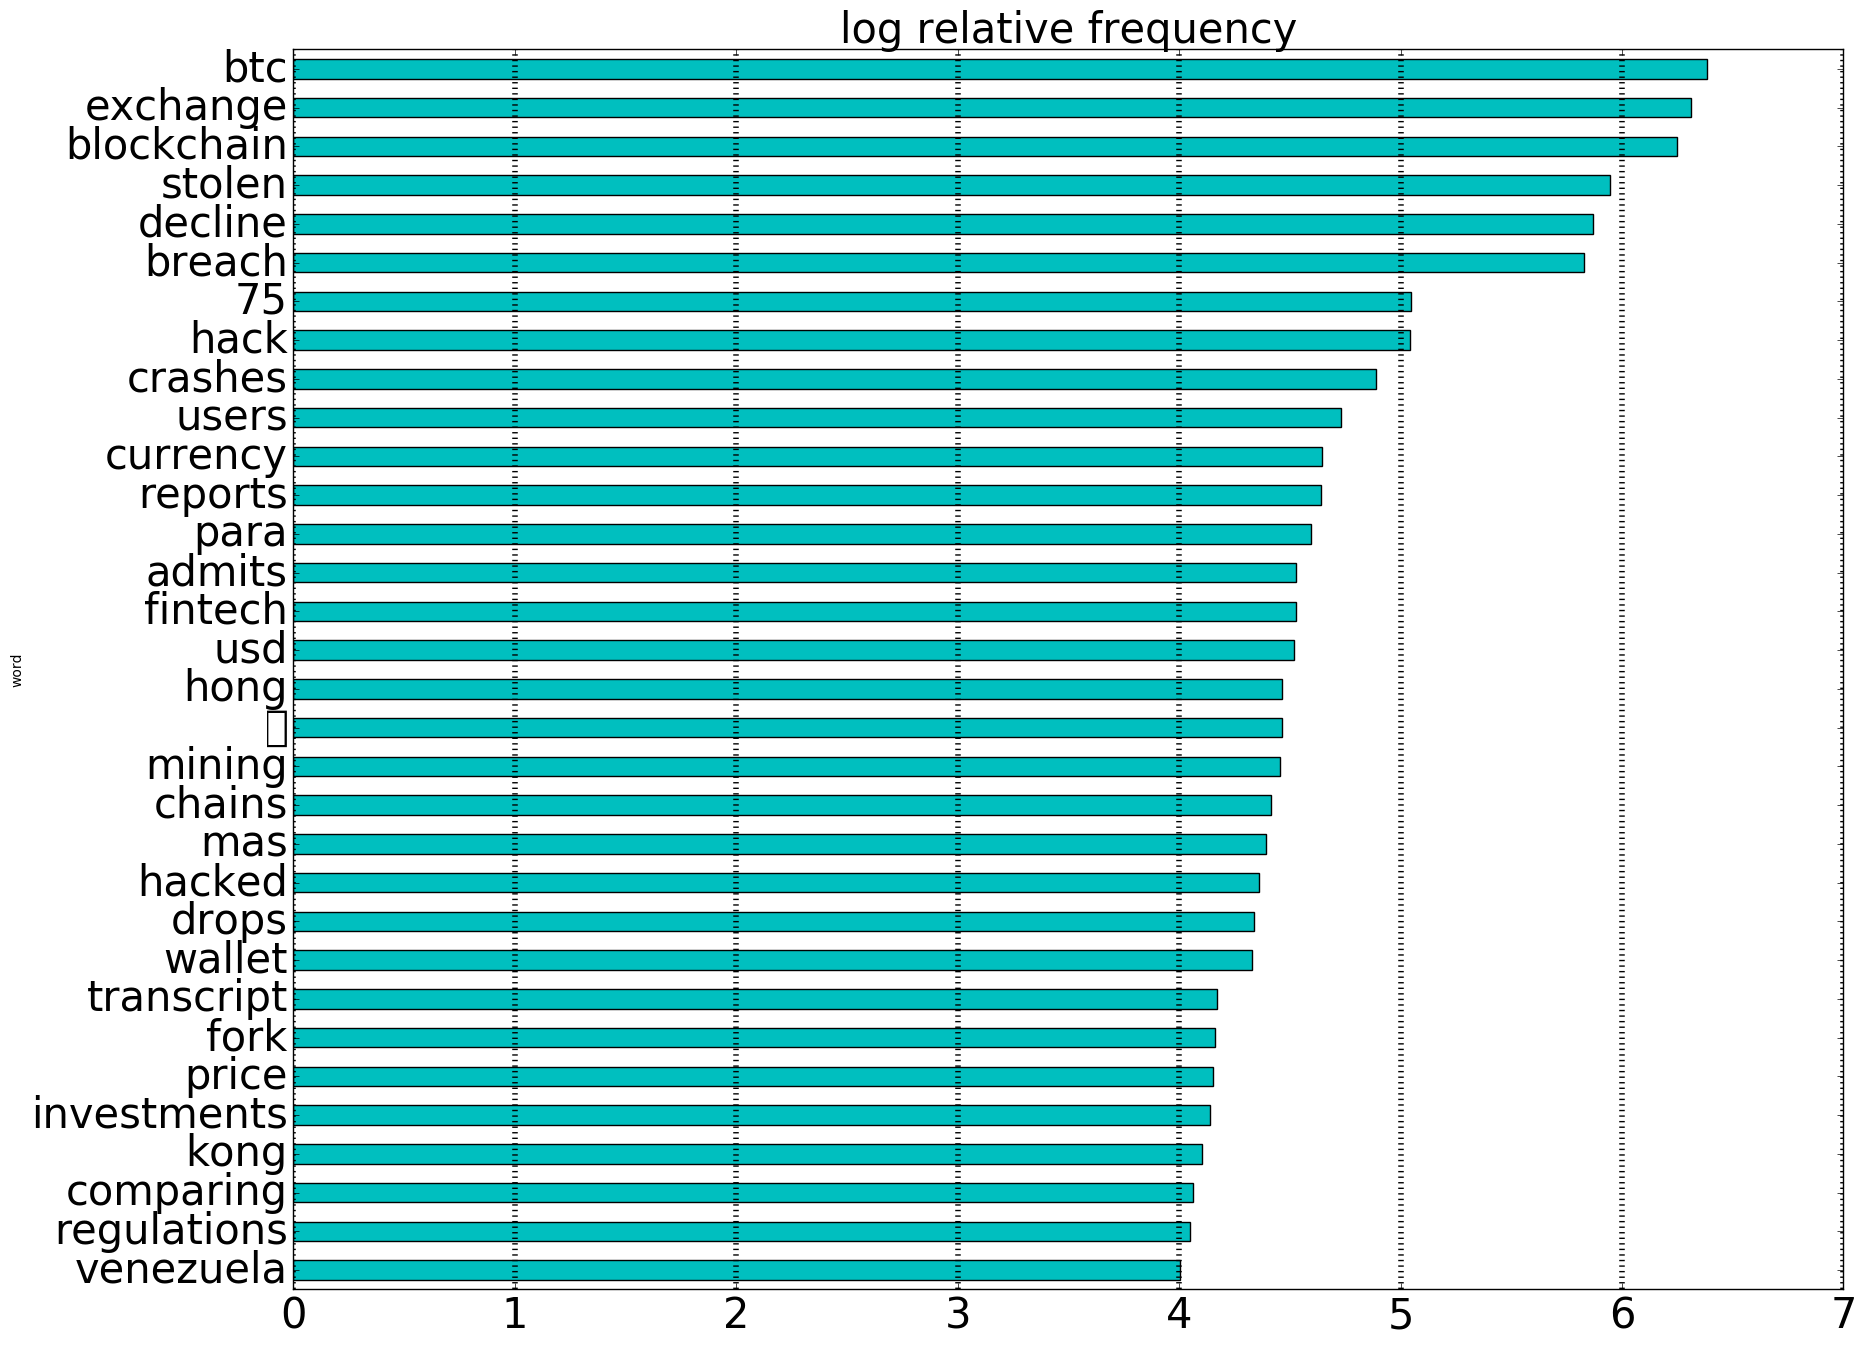

In [12]:
num_words_to_plot = 32
background_cutoff = 500
twit.word_freq_df[twit.word_freq_df["background_occur"]>background_cutoff].sort_values("log relative frequency", ascending=True).set_index("word")["log relative frequency"][-num_words_to_plot:].plot.barh(figsize=(20,
                num_words_to_plot/2.), fontsize=30, color="c"); 
plt.title("log relative frequency", fontsize=30); 
ax = plt.axes();        
ax.xaxis.grid(linewidth=4);

In [14]:
twit.tweets_containing("decline")[:10]

56 tweets contain this term


,username,text
206,montrealapartm,montreal rental apartments - bitcoin price in medium-term decline - cryptocoinsnews
247,pixlllpro,"@chrisdunntv what is your stance on the decline in #bitcoin value, since the second halving? what btc value do you expect by the year's end?"
324,tkforextv,bitcoin price continues medium-term decline …
411,virtualcoinwave,bitcoin price continues medium-term decline pic.twitter.com/5396tvey7x
423,svaladares,bitcoin drops nearly 20% as exchange hack amplifies price decline … via @coindesk
444,diener_gottes,bitcoin drops nearly 20% as exchange hack amplifies price decline: bitcoin #prices fell…
449,mbllngr,"modern-day augury: bitcoin drops nearly 20% as exchange hack amplifies price decline"" …"""
453,cryptobrokerio,bitcoin drops nearly 20% as exchange hack amplifies price decline - coindesk - pic.twitter.com/le6onqhjwh
454,thecalimancan,bitcoin drops nearly 20% as exchange hack amplifies price decline …
471,blackbulltradn,coindesk: breaking: bitcoin drops nearly 20% as exchange hack amplifies price decline …pic.twitter.com/ugxv0lopg5


## At least 2000 background occurrences:

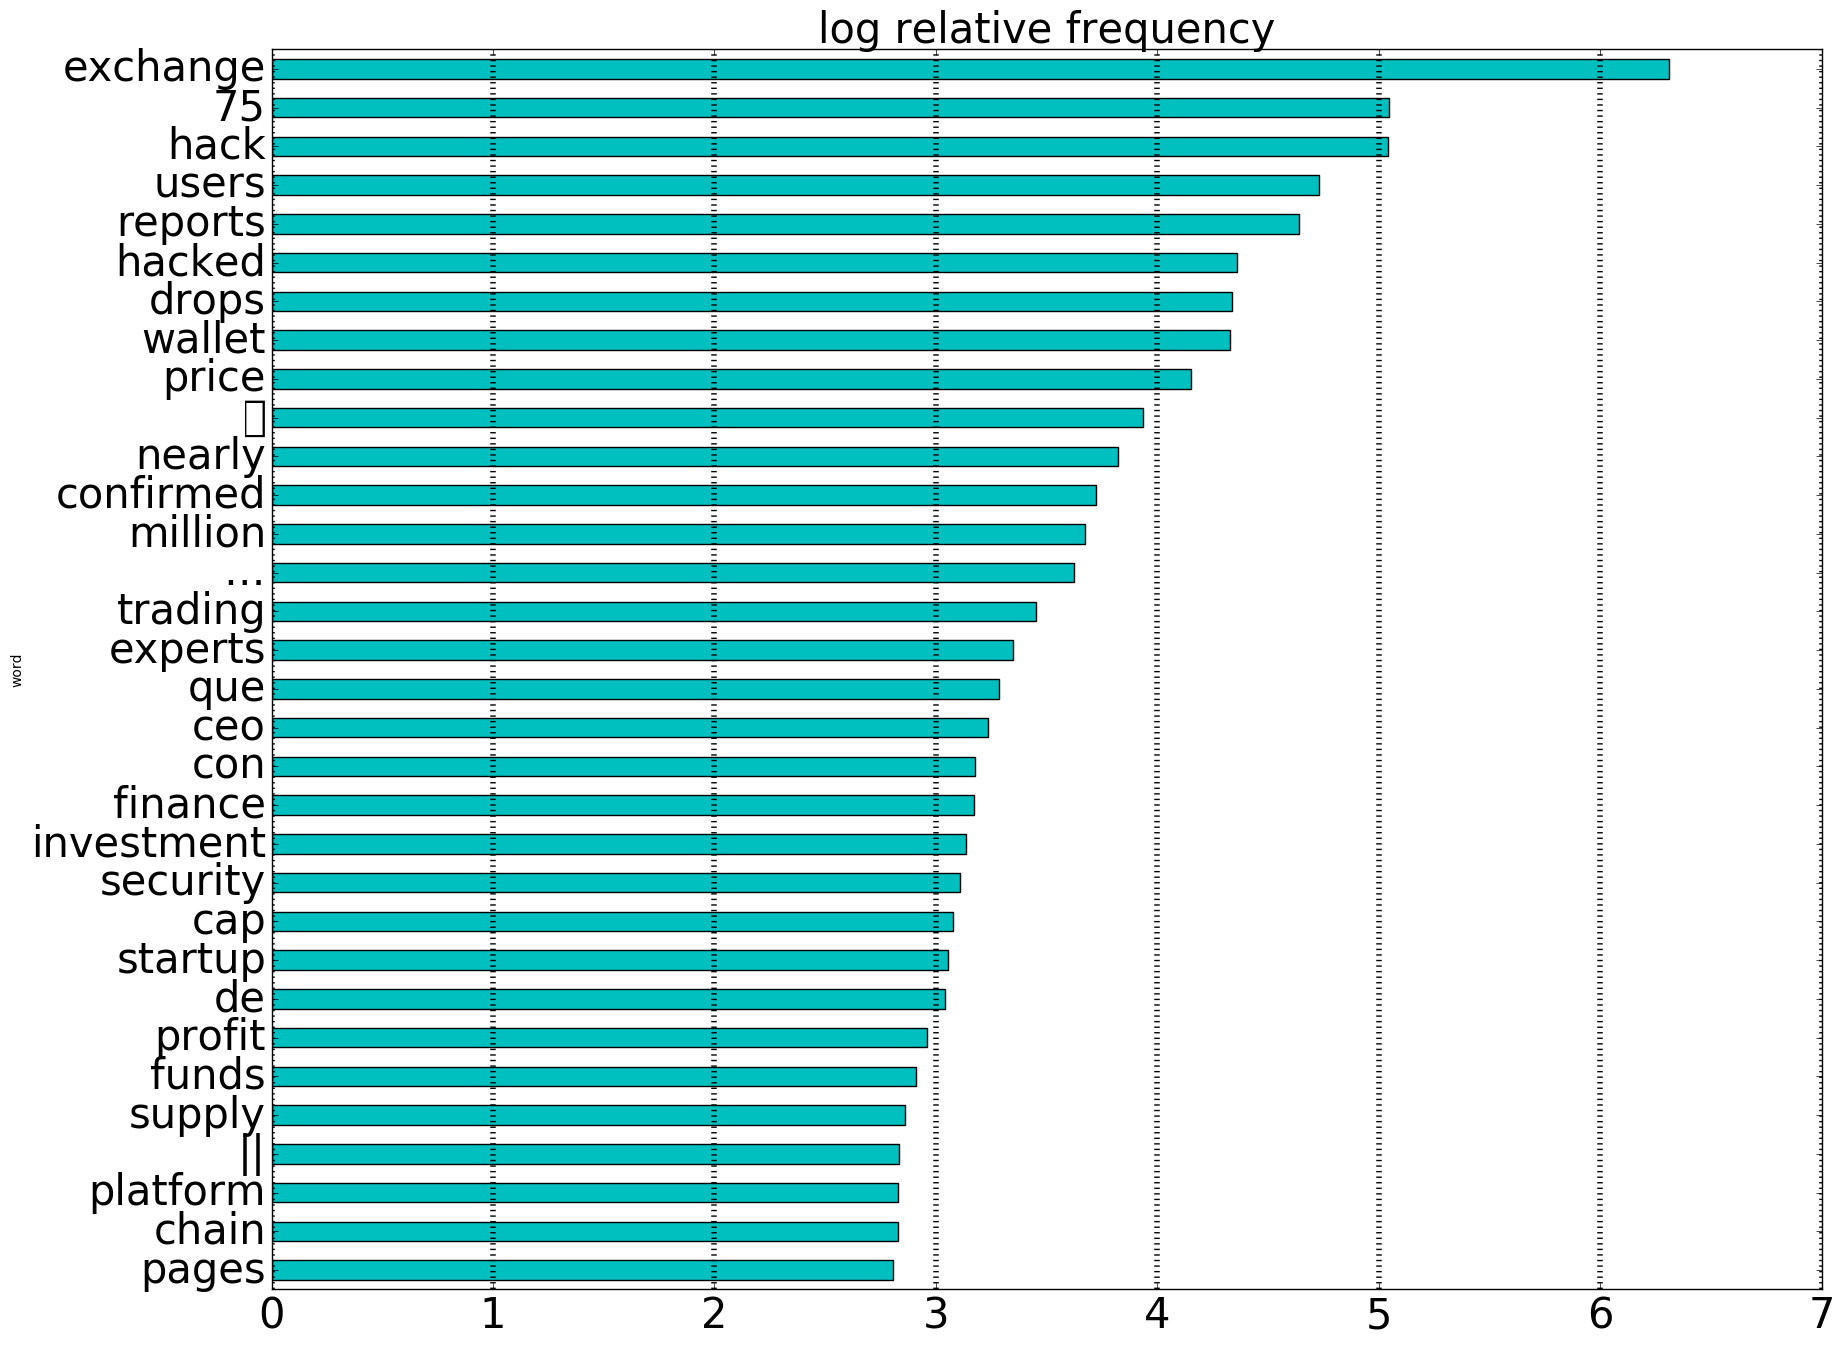

In [16]:
num_words_to_plot = 32
background_cutoff = 2000
twit.word_freq_df[twit.word_freq_df["background_occur"]>background_cutoff].sort_values("log relative frequency", ascending=True).set_index("word")["log relative frequency"][-num_words_to_plot:].plot.barh(figsize=(20,
                num_words_to_plot/2.), fontsize=30, color="c"); 
plt.title("log relative frequency", fontsize=30); 
ax = plt.axes();        
ax.xaxis.grid(linewidth=4);

In [18]:
twit.tweets_containing("confirmed")[:10]

23 tweets contain this term


,username,text
442,tm_interesting,"it news: 119,756 btc confirmed stolen from major bitcoin exchange, bitfinex"
476,neuropuff,"119,756 btc confirmed stolen from major bitcoin exchange, bitfinex"
501,bacelyy,"119,756 btc confirmed stolen from major bitcoin exchange, bitfinex: comments"
507,hackalertnews,"119,756 btc confirmed stolen from major bitcoin exchange, bitfinex … #hb"
519,reclaimifytest,"119,756 btc confirmed stolen from major bitcoin exchange, bitfinex …"
529,theretweetplace,"119,756 btc confirmed stolen from major bitcoin exchange, bitfinex:"
549,zachariepinneau,"bitfinex hack usd 60,000,000 confirmed stolen via /r/ #bitcoin"
576,romankluka,"bitfinex hacked, bitcoin confirmed stolen"" … #cryptocurrency #feedly"""
578,rhysosborne1,"119,756 btc confirmed stolen from major bitcoin exchange, bitfinex by via hacker news"
640,newsyc20,"119,756 btc confirmed stolen from major bitcoin exchange, bitfinex ( )"
